# Project: Wrangling and Analyze Data

## Table of Content

1. [Introduction](#Introduction)
2. [Data Gathering](#Data-Gathering)
3. [Data Assesment](#Assessing-Data)
4. [Data Cleaning](#Cleaning-Data)
5. [Data Storing](#Data-Storing)
6. [Analyzing and Visualizing Data](#Analyzing-and-Visualizing-Data)

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# import neccesary library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import neccesary library

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

pd.options.display.max_colwidth = 600

In [3]:
#collect twitter archive data

df_1 = pd.read_csv('twitter-archive-enhanced.csv')
df_1.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None


In [4]:
# Use the Requests library to download the tweet image prediction (image_predictions.tsv)

import re
import requests as req
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

In [5]:
data = req.get(url)
data.headers['content-type']

'text/tab-separated-values; charset=utf-8'

In [6]:
data.raise_for_status()
open('samplefile.txt', 'wb').write(data.content)

335079

In [7]:
df_2 = pd.read_table('samplefile.txt', sep='\t')
df_2.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [8]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

In [9]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [10]:
# Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [11]:
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

2356

In [12]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

In [13]:
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
#api = tweepy.API(auth, wait_on_rate_limit=True, sleep_on_rate_limit=False)

print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [14]:
df_3 = pd.read_json('tweet_json.txt', lines=True)

In [15]:
data.raise_for_status()
open('tweet_json.txt', 'wb').write(data.content)

335079

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [16]:
#Assess the enhanced twitter archive data

df_1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1393,700029284593901568,NaN,NaN,2016-02-17 18:49:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Coops. His ship is taking on water. Sound the alarm. Much distress. Requesting immediate assistance. 10/10 https://t.co/8Nuny4lLE3,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700029284593901568/photo/1,10,10,Coops,None,None,None,None
322,834167344700198914,NaN,NaN,2017-02-21 22:26:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sunshine. She doesn't believe in personal space. Eyes pretty far apart for a dog. Has horns (whoa). 11/10 would pet with wonder https://t.co/o3bhLguymB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834167344700198914/photo/1,11,10,Sunshine,None,None,None,None
1167,721503162398597120,NaN,NaN,2016-04-17 00:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Panda. He's happy af. 11/10 https://t.co/IOAk9i4UvE,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/721503162398597120/photo/1,https://twitter.com/dog_rates/status/721503162398597120/photo/1,https://twitter.com/dog_rates/status/721503162398597120/photo/1,https://twitter.com/dog_rates/status/721503162398597120/photo/1",11,10,Panda,None,None,None,None
1065,740711788199743490,NaN,NaN,2016-06-09 01:07:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we are witnessing the touchdown of a pupnado. It's not funny it's actually very deadly. 9/10 might still pet https://t.co/CmLoKMbOHv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/740711788199743490/photo/1,9,10,None,None,None,None,None
994,748568946752774144,NaN,NaN,2016-06-30 17:28:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cora. She rings a bell for treats. 12/10 precious af (vid by @skyehellenkamp) https://t.co/uUncaAGH18,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748568946752774144/video/1,12,10,Cora,None,None,None,None


In [17]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [18]:
# Assess the image prediction data

df_2.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1147,730924654643314689,https://pbs.twimg.com/media/CiTEFjDXAAAqU6I.jpg,1,polecat,0.185382,False,mink,0.105282,False,Newfoundland,0.086241,True
2008,878057613040115712,https://pbs.twimg.com/media/DC98vABUIAA97pz.jpg,1,French_bulldog,0.839097,True,Boston_bull,0.078799,True,toy_terrier,0.015243,True
646,681654059175129088,https://pbs.twimg.com/media/CXW4wGHWsAE_eBD.jpg,1,Pomeranian,0.800538,True,chow,0.146892,True,Pekinese,0.037613,True
1296,752173152931807232,https://pbs.twimg.com/media/CnBBfNuWcAAkOgO.jpg,1,Labrador_retriever,0.527659,True,German_shepherd,0.174765,True,Chihuahua,0.045525,True
493,675707330206547968,https://pbs.twimg.com/media/CWCYOqWUAAARmGr.jpg,1,bath_towel,0.721933,False,Staffordshire_bullterrier,0.059344,True,bagel,0.035702,False


In [19]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
# Assess the twitter API data

df_3.sample(5)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
191,NaN,NaN,2017-04-17 16:34:26,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 854010162683707392, 'id_str': '854010162683707392', 'indices': [141, 164], 'media_url': 'http://pbs.twimg.com/media/C9oNt91WAAAFSLS.jpg', 'media_url_https': 'https://pbs.twimg.com/media/C9oNt91WAAAFSLS.jpg', 'url': 'https://t.co/TXdT3tmuYk', 'display_url': 'pic.twitter.com/TXdT3tmuYk', 'expanded_url': 'https://twitter.com/dog_rates/status/854010172552949760/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1200, 'h': 857, 'resize': 'fit'}, 'small': {'w': 680...","{'media': [{'id': 854010162683707392, 'id_str': '854010162683707392', 'indices': [141, 164], 'media_url': 'http://pbs.twimg.com/media/C9oNt91WAAAFSLS.jpg', 'media_url_https': 'https://pbs.twimg.com/media/C9oNt91WAAAFSLS.jpg', 'url': 'https://t.co/TXdT3tmuYk', 'display_url': 'pic.twitter.com/TXdT3tmuYk', 'expanded_url': 'https://twitter.com/dog_rates/status/854010172552949760/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1200, 'h': 857, 'resize': 'fit'}, 'small': {'w': 680, 'h': 485, 'resize': 'fit'}, 'large': {'w': 2048, 'h': 1462, 'r...",14785,False,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",NaN,...,NaN,NaN,NaN,NaN,2782,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs®', 'screen_name': 'dog_rates', 'location': 'all our links ➜', 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➜ WeRateDogs partnerships@weratedogs.com | nonprofit: @15outof10 ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀', 'url': 'https://t.co/YPc2Xq4Va2', 'entities': {'url': {'urls': [{'url': 'https://t.co/YPc2Xq4Va2', 'expanded_url': 'http://links.weratedogs.com', 'display_url': 'links.weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 9370515, 'friends_count': 21,..."
139,NaN,NaN,2017-05-14 00:34:33,"[0, 91]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'AmiWinehouse', 'name': 'Ami Lee Winehouse', 'id': 1165500693492297728, 'id_str': '1165500693492297728', 'indices': [77, 90]}], 'urls': [], 'media': [{'id': 863553036815355904, 'id_str': '863553036815355904', 'indices': [92, 115], 'media_url': 'http://pbs.twimg.com/ext_tw_video_thumb/863553036815355904/pu/img/B6Dos-XOD8l82tK7.jpg', 'media_url_https': 'https://pbs.twimg.com/ext_tw_video_thumb/863553036815355904/pu/img/B6Dos-XOD8l82tK7.jpg', 'url': 'https://t.co/tordvmaaop', 'display_url': 'pic.twitter.com/tordvmaaop', 'expand...","{'media': [{'id': 863553036815355904, 'id_str': '863553036815355904', 'indices': [92, 115], 'media_url': 'http://pbs.twimg.com/ext_tw_video_thumb/863553036815355904/pu/img/B6Dos-XOD8l82tK7.jpg', 'media_url_https': 'https://pbs.twimg.com/ext_tw_video_thumb/863553036815355904/pu/img/B6Dos-XOD8l82tK7.jpg', 'url': 'https://t.co/tordvmaaop', 'display_url': 'pic.twitter.com/tordvmaaop', 'expanded_url': 'https://twitter.com/dog_rates/status/863553081350529029/video/1', 'type': 'video', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 320, 'h': 568, 'resize': 'fit'}, 'smal...",13614,False,This is Neptune. He's a backpup vocalist for the Dixie Chicks. 13/10 (vid by @AmiWinehouse) https://t.co/tordvmaaop,NaN,...,NaN,NaN,NaN,NaN,3610,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs®'

In [21]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2327 non-null datetime64[ns]
display_text_range               2327 non-null object
entities                         2327 non-null object
extended_entities                2057 non-null object
favorite_count                   2327 non-null int64
favorited                        2327 non-null bool
full_text                        2327 non-null object
geo                              0 non-null float64
id                               2327 non-null int64
id_str                           2327 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

## Quality issues

`Twitter Image Prediction Table`
1. Column header (p1, p1_config, p1_dog, p2, p2_config, p2_dog, p3, p3_config, p3_dog) not descriptive enough.
2. Invalid data representation for percentage in p1_config, p2_config, p3_config

`Twitter Archive Enhanced Table`
3. 745 None values as dog name
4. Some dog names are not feasibly correct like 'a', 'an'. 
5. Text column contains url apart from the text column
6. Time stamp is contians string instead of date time format
7. Rating denominator can't be zero

`Twitter API data Table`
8. Nondescriptive column header "id"

## Tidiness issues

`Twitter Archieved Enhanced Table`
1. A single observation unit is stored in multiple column (doggo, floofer, pupper, puppo) shoild all be in dog stages.

`Twitter API data Table`
2. Too many observational unit in one table

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [81]:
# Make copies of original pieces of data
df1_clean = df_1.copy()
df2_clean = df_2.copy()
df3_clean = df_3.copy()

## Quality Issues

`Twitter image prediction table`

### Issue #1: Column header (p1, p1_config, p1_dog, p2, p2_config, p2_dog, p3, p3_config, p3_dog) not descriptive enough.

#### Define: 

Rename nondescriptive column headers to be more readeble. "img_num, p1, p1_config, p1_dog, p2, p2_config, p2_dog, p3, p3_config, p3_dog" should be "img_number, 1st_prediction, 1st_confidence, 1st_DogBreed, 2nd_prediction, 2nd_confidence, 2nd_DogBreed, 3rd_prediction, 3rd_confidence, 3rd_DogBreed"

In [23]:
#View inappropriate column heads

df_2.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


#### Code

In [24]:
#rename inappropriate column head

df2_clean.rename(columns={'img_num':'img_number', 'p1':'1st_prediction', 'p1_conf':'1st_confidence', 'p1_dog':'1st_DogBreed', 'p2':'2nd_prediction', 'p2_conf':'2nd_confidence', 'p2_dog':'2nd_DogBreed', 'p3':'3rd_prediction', 'p3_conf':'3rd_confidence', 'p3_dog':'3rd_DogBreed'}, inplace=True)

#### Test

In [25]:
df2_clean.head(2)

,tweet_id,jpg_url,img_number,1st_prediction,1st_confidence,1st_DogBreed,2nd_prediction,2nd_confidence,2nd_DogBreed,3rd_prediction,3rd_confidence,3rd_DogBreed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


### Issue #2:  Invalid data representation for percentage in p1_conf, p2_conf, p3_conf

#### Define:

Reformat each prediction's confidence level (1st, 2nd, 3rd) to be represented in percentage.

In [26]:
#View inappropriate confidence level format

df_2[['p1_conf', 'p2_conf', 'p3_conf']].head(2)

,p1_conf,p2_conf,p3_conf
0,0.465074,0.156665,0.061428
1,0.506826,0.074192,0.072010


#### Code

In [27]:
#correct confidence level format

df2_clean['1st_confidence'] = df2_clean['1st_confidence'].map(lambda n: '{:,.2%}'.format(n))
df2_clean['2nd_confidence'] = df2_clean['2nd_confidence'].map(lambda n: '{:,.2%}'.format(n))
df2_clean['3rd_confidence'] = df2_clean['3rd_confidence'].map(lambda n: '{:,.2%}'.format(n))

#### Test

In [28]:
df2_clean.sample(3)

,tweet_id,jpg_url,img_number,1st_prediction,1st_confidence,1st_DogBreed,2nd_prediction,2nd_confidence,2nd_DogBreed,3rd_prediction,3rd_confidence,3rd_DogBreed
238,670434127938719744,https://pbs.twimg.com/media/CU3cSG8W4AIAePH.jpg,1,jack-o'-lantern,91.91%,False,Chesapeake_Bay_retriever,2.74%,True,Labrador_retriever,2.01%,True
1831,836380477523124226,https://pbs.twimg.com/media/C5trm6iWgAQ22Hw.jpg,1,wooden_spoon,8.25%,False,sliding_door,6.10%,False,grand_piano,5.51%,False
804,691675652215414786,https://pbs.twimg.com/media/CZlTVL4WkAEpVR5.jpg,1,Chihuahua,18.29%,True,teddy,12.81%,False,West_Highland_white_terrier,9.79%,True


`Twitter Archive Enhanced Table`

### Issue #3: 745 None values as dog name

#### Define: 
A significant number of dogs (745) has None as their name in the data

In [29]:
# Count the number of names with None value
df_1['name'].value_counts()

None        745
a            55
Charlie      12
Cooper       11
Oliver       11
Lucy         11
Tucker       10
Lola         10
Penny        10
Winston       9
Bo            9
the           8
Sadie         8
Bailey        7
an            7
Buddy         7
Daisy         7
Toby          7
Dave          6
Leo           6
Oscar         6
Jack          6
Scout         6
Rusty         6
Koda          6
Stanley       6
Milo          6
Bella         6
Jax           6
Sammy         5
           ... 
Eugene        1
Jameson       1
Mosby         1
Sweets        1
Mollie        1
Harrison      1
Dobby         1
Lucky         1
Mabel         1
Pubert        1
Toffee        1
Lucia         1
Kingsley      1
Akumi         1
Bobbay        1
Zooey         1
Mauve         1
Rumble        1
Cecil         1
Loomis        1
Murphy        1
Sparky        1
Kody          1
Terrenth      1
Rudy          1
Frönq         1
Glenn         1
Covach        1
Billy         1
Meera         1
Name: name, Length: 957,

#### Code

No programmatic solution for this issue as we can't make up names afor the dogs. We can only observe and take note of them as they can affect our analysis.

#### Test

In [30]:
df1_clean_name_is_none = df_1.query('name == "None"')
df1_clean_name_is_none[['tweet_id', 'name']].sample(3)

,tweet_id,name
234,847617282490613760,None
913,757400162377592832,None
990,748705597323898880,None


### Issue #4: Text column contains url apart from the text column

#### Define:

Split the text colunmn into two with the keyword 'https' and delete the newly newly formed column.

In [83]:
# View the text column containing url path
df_1['text'].sample(5)

183     This is Callie. She'll be your navigator today. Takes her job very seriously. Will shift for you. One ear always in the pupholder. 12/10 https://t.co/Bh9DtLhIBO
7                         When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq
1358                                                     This is Charlie. He's a West Side Niddlewog. Mucho fluffy. 12/10 would pet so damn well https://t.co/B9dOrmnPVt
1797                                                                    This is the happiest pupper I've ever seen. 10/10 would trade lives with https://t.co/ep8ATEJwRb
1785                                                             This is a dog swinging. I really enjoyed it so I hope you all do as well. 11/10 https://t.co/Ozo9KHTRND
Name: text, dtype: object

#### Code

In [84]:
#split the text column using https:\\

df1_clean['newtext'] = df1_clean['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [87]:
#drop column containing url path

df1_clean = df1_clean.drop(columns='text')

### Test

In [88]:
df1_clean['newtext'].sample(5)

1327    This is Adele. Her tongue flies out of her mouth at random. It's a debilitating illness. 10/10 stay strong pupper 
1625                                          This little fella really hates stairs. Prefers bush. 13/10 legendary pupper 
616                                    Here's a sleepy doggo that requested some assistance. 12/10 would carry everywhere 
449                                   This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet 
680                This is Lucy. She destroyed not one, but two remotes trying to turn off the debate. 11/10 relatable af 
Name: newtext, dtype: object

### Issue #5: Some dog names are not feasibly correct like 'a', 'an'.

#### Define:

Not all the dog names are realistically correct. Here, I will be correct the names that have 'a' and 'an' in the column name.

In [35]:
#Count the number of names that has 'a' and 'an' as value

df1_clean['name'].value_counts()

None        745
a            55
Charlie      12
Cooper       11
Oliver       11
Lucy         11
Tucker       10
Lola         10
Penny        10
Winston       9
Bo            9
the           8
Sadie         8
Bailey        7
an            7
Buddy         7
Daisy         7
Toby          7
Dave          6
Leo           6
Oscar         6
Jack          6
Scout         6
Rusty         6
Koda          6
Stanley       6
Milo          6
Bella         6
Jax           6
Sammy         5
           ... 
Eugene        1
Jameson       1
Mosby         1
Sweets        1
Mollie        1
Harrison      1
Dobby         1
Lucky         1
Mabel         1
Pubert        1
Toffee        1
Lucia         1
Kingsley      1
Akumi         1
Bobbay        1
Zooey         1
Mauve         1
Rumble        1
Cecil         1
Loomis        1
Murphy        1
Sparky        1
Kody          1
Terrenth      1
Rudy          1
Frönq         1
Glenn         1
Covach        1
Billy         1
Meera         1
Name: name, Length: 957,

#### Code

In [36]:
#select text that has 'a' and 'an' in them

name = ['a', 'an']
df1_name = df1_clean.loc[df1_clean['name'].isin(name)]
df1_name[['text', 'name']].sample(20)

,text,name
2287,This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10 https://t.co/jpaeu6LNmW,a
1004,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,a
2146,This is a spotted Lipitor Rumpelstiltskin named Alphred. He can't wait for the Turkey. 10/10 would pet really well https://t.co/6GUGO7azNX,a
2353,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,a
2222,Here is a mother dog caring for her pups. Snazzy red mohawk. Doesn't wag tail. Pups look confused. Overall 4/10 https://t.co/YOHe6lf09m,a
1340,Here is a heartbreaking scene of an incredible pupper being laid to rest. 10/10 RIP pupper https://t.co/81mvJ0rGRu,a
1002,This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,a
1941,This is a heavily opinionated dog. Loves walls. Nobody knows how the hair works. Always ready for a kiss. 4/10 https://t.co/dFiaKZ9cDl,a
2218,This is a Birmingham Quagmire named Chuk. Loves to relax and watch the game while sippin on that iced mocha. 10/10 https://t.co/HvNg9JWxFt,a
2235,This is a Trans Siberian Kellogg named Alfonso. Huge ass eyeballs. Actually Dobby from Harry Potter. 7/10 https://t.co/XpseHBlAAb,a


In [37]:
#split text string using 'named' keyword

name = df1_name['text'].str.split('named ', n=1, expand=True)

In [38]:
named = name[1].str.split('.', n=1, expand=True)

In [39]:
df1_name['new_name'] = named[0]
df1_named = df1_name[['tweet_id', 'new_name']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
#merge new name to the entire data

df1_cleaned = pd.merge(df1_clean, df1_named, on='tweet_id', how='left')

In [41]:
df1_cleaned['correct_name'] = df1_cleaned['name']
df1_cleaned['correct_name'][(df1_cleaned['new_name'] != 'None') & (df1_cleaned['new_name'].notna())] = df1_cleaned['new_name']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Test

In [42]:
df1_cleaned[(df1_cleaned['new_name'] != 'None') & (df1_cleaned['new_name'].notna())][['name','correct_name','new_name']]

,name,correct_name,new_name
1853,a,Wylie,Wylie
1955,a,Kip,Kip
2034,a,Jacob (Yacōb),Jacob (Yacōb)
2066,a,Rufus,Rufus
2116,a,Spork,Spork
2125,a,Cherokee,Cherokee
2128,a,Hemry,Hemry
2146,a,Alphred,Alphred
2161,a,Alfredo,Alfredo
2191,a,Leroi,Leroi


### Issue #6: Time stamp is contians string instead of date time format

#### Define:

Convert column format of 'timestamp' to datrtimestamp

In [43]:
#view timestamp data type

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### Code

In [44]:
#change timestamp to datetime format

df1_clean['timestamp'] = pd.to_datetime(df1_clean['timestamp'])

#### Test

In [45]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

### Issue #7: Rating denominator can't be zero

#### Define:

Review the text value corresponding to the denominator reading zero and extract the correct value for the numerator.

In [46]:
# view row that has 0 as denominator

df_1.query('rating_denominator == 0')[['tweet_id', 'text', 'rating_denominator']]

,tweet_id,text,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",0


#### Code

In [47]:
#select row with value zero

df1_sn = df_1.iloc[[313]]
df1_sn

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [48]:
#split text with the '/' key to get the correct denominator

dn = df1_sn['text'].str.split('/', n=1, expand=True)
dn1 = dn[1].str.split('/', n=1, expand=True)
dn1

,0,1
313,"00 isn't a valid rating, 13",10 is tho


In [49]:
df1_sn["denominator"]= dn1[1].str.extract(r'(\d+)', expand=True).astype(float)
df1_sn = df1_sn[['tweet_id','denominator']]
df1_sn

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,tweet_id,denominator
313,835246439529840640,10.0


In [50]:
#merge correct denominator into data

df1_clean = pd.merge(df1_clean, df1_sn, on='tweet_id', how='left')

In [51]:
df1_clean['correct_denominator'] = df1_clean['rating_denominator']
df1_clean['correct_denominator'][df1_clean.denominator.notnull()] = df1_clean['denominator']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [52]:
df1_clean = df1_clean.drop(columns='denominator')

#### Test

In [53]:
df1_clean.iloc[[313]][['text', 'correct_denominator']]

,text,correct_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",10


`Twitter API data table`

### Issue #8: Nondescriptive column header "id"

#### Define:

Rename the column name 'id' to 'tweet_id' to make the column descriptive and the data relational.

In [54]:
#view all column heads for non descriptive entry

df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2327 non-null datetime64[ns]
display_text_range               2327 non-null object
entities                         2327 non-null object
extended_entities                2057 non-null object
favorite_count                   2327 non-null int64
favorited                        2327 non-null bool
full_text                        2327 non-null object
geo                              0 non-null float64
id                               2327 non-null int64
id_str                           2327 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

#### Code

In [55]:
# rename column head 'id' into 'tweet_id'

df3_clean.rename(columns={'id':'tweet_id'}, inplace=True)

#### Test

In [56]:
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2327 non-null datetime64[ns]
display_text_range               2327 non-null object
entities                         2327 non-null object
extended_entities                2057 non-null object
favorite_count                   2327 non-null int64
favorited                        2327 non-null bool
full_text                        2327 non-null object
geo                              0 non-null float64
tweet_id                         2327 non-null int64
id_str                           2327 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

## Tidiness Issues

`Twitter Archieved Enhanced Table`

### Issue #1: A single observation unit is stored in multiple column (doggo, floofer, pupper, puppo) shoild all be in dog stages.

#### Define:

Create a new column named 'dog_stage' and assign corresponding to the dog stages according to doggo, floofer, pupper and puppo form the table in the new single column.

In [57]:
#view column holding dog stages

df_1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2068,671138694582165504,NaN,NaN,2015-11-30 01:28:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Me running from commitment. 10/10 https://t.co/ycVJyFFkES,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671138694582165504/photo/1,10,10,None,None,None,None,None
397,825120256414846976,NaN,NaN,2017-01-27 23:16:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Say hello to Pablo. He's one gorgeous puppo. A true 12/10. Click the link to see why Pablo requests your assistance\n\nhttps:/…,8.250266e+17,4.196984e+09,2017-01-27 17:04:02 +0000,"https://www.gofundme.com/my-puppys-double-cataract-surgery,https://twitter.com/dog_rates/status/825026590719483904/photo/1,https://twitter.com/dog_rates/status/825026590719483904/photo/1",12,10,Pablo,None,None,None,puppo
736,780931614150983680,NaN,NaN,2016-09-28 00:46:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I want to finally rate this iconic puppo who thinks the parade is all for him. 13/10 would absolutely attend https://t.co/5dUYOu4b8d,NaN,NaN,NaN,https://twitter.com/dog_rates/status/780931614150983680/photo/1,13,10,None,None,None,None,puppo
85,876120275196170240,NaN,NaN,2017-06-17 16:52:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Venti, a seemingly caffeinated puppoccino. She was just informed the weekend would include walks, pats and scritches. 13/10 much excite https://t.co/ejExJFq3ek",NaN,NaN,NaN,https://twitter.com/dog_rates/status/876120275196170240/photo/1,13,10,Venti,None,None,None,None
1056,742161199639494656,NaN,NaN,2016-06-13 01:06:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Doug. He's trying to float away. 12/10 you got this Doug https://t.co/bZaHC3lvTL,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742161199639494656/photo/1,12,10,Doug,None,None,None,None


#### Code

In [58]:
# Combine all four columns into one and select each stoge as entry

df1_clean['stage'] = df1_clean['doggo'] + '_' + df1_clean['floofer'] + '_' + df1_clean['pupper'] +'_'+ df1_clean['puppo']

In [59]:
df1_clean['stage'] = df1_clean['stage'].str.replace('None', '')

In [60]:
df1_clean['dog_stage'] = df1_clean['stage'].str.replace('_', '')

In [61]:
df1_clean = df1_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo', 'stage'])

#### Test

In [62]:
df1_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,correct_denominator,dog_stage
1472,693942351086120961,NaN,NaN,2016-01-31 23:42:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Kobe. He's a Speckled Rorschach. Requests that someone holds his hand during car rides. 10/10 sick interior https://t.co/LCA6Fr3X2M,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693942351086120961/photo/1,10,10,Kobe,10,
1668,682638830361513985,NaN,NaN,2015-12-31 19:05:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have no words. Just a magnificent pup. 12/10 https://t.co/viwWHZgX8j,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/682638830361513985/photo/1,https://twitter.com/dog_rates/status/682638830361513985/photo/1,https://twitter.com/dog_rates/status/682638830361513985/photo/1,https://twitter.com/dog_rates/status/682638830361513985/photo/1",12,10,None,10,
2255,667773195014021121,NaN,NaN,2015-11-20 18:35:10,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is a rare Hungarian Pinot named Jessiga. She is either mid-stroke or got stuck in the washing machine. 8/10 https://t.co/ZU0i0KJyqD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667773195014021121/photo/1,8,10,a,10,
403,824297048279236611,NaN,NaN,2017-01-25 16:45:05,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Nala. She got in trouble. One h*ck of a pupnishment. Still 11/10 would pet https://t.co/EmJbG0skLt,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/824297048279236611/photo/1,https://twitter.com/dog_rates/status/824297048279236611/photo/1",11,10,Nala,10,
773,776249906839351296,NaN,NaN,2016-09-15 02:42:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: We only rate dogs. Pls stop sending in non-canines like this Mongolian grass snake. This is very frustrating. 11/10 https://…,7.007478e+17,4.196984e+09,2016-02-19 18:24:26 +0000,https://twitter.com/dog_rates/status/700747788515020802/photo/1,11,10,very,10,


`Twitter API data Table`

### Issues #2: Too many observational unit in one table

#### Define:

Since the data we need from the `Twitter API data` is the retweet counts and the favourite counts, we can reduce the whole data set to the columns that will be useful for our observation which is tweet_id, retweet count and favourite count.

In [63]:
#view all columns in Twitter API data

df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2327 non-null datetime64[ns]
display_text_range               2327 non-null object
entities                         2327 non-null object
extended_entities                2057 non-null object
favorite_count                   2327 non-null int64
favorited                        2327 non-null bool
full_text                        2327 non-null object
geo                              0 non-null float64
id                               2327 non-null int64
id_str                           2327 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

#### Code

In [64]:
#subset the dataframe to the needed data for this project

df3_clean = df3_clean[['tweet_id', 'favorite_count', 'retweet_count']]

#### Test

In [65]:
df3_clean.sample(5)

,tweet_id,favorite_count,retweet_count
289,836260088725786625,19889,3966
985,747219827526344708,4870,1431
2122,669682095984410625,310,115
1359,700505138482569216,2094,520
1002,745433870967832576,6512,2297


### Issue #2: Delete rows that are not original tweets

#### Define:

According to the project motivation, we only want original tweets and not retweet. We will drop every text row entry that start with `RT @` as this stands for retweet

In [102]:
df_1[df_1['text'].str.contains('RT @')]['text'].sample(5)

73      RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…
438    RT @dog_rates: This is Oliver. He has dreams of being a service puppo so he can help his owner. 13/10 selfless af\n\nmake it happen:\nhttps://…
602                                            RT @dog_rates: This is Paull. He just stubbed his toe. 10/10 deep breaths Paull https://t.co/J5Mqn8VeYq
759       RT @dog_rates: This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR
669       RT @dog_rates: This is Leela. She's a Fetty Woof. Lost eye while saving a baby from an avalanche. 11/10 true h*ckin hero https://t.co/2lBg3…
Name: text, dtype: object

#### code

In [106]:
df1_text = df1_clean[df1_clean['newtext'].str.contains('RT @')]
df1_text

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,newtext
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None,RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None,RT @Athletics: 12/10 #BATP
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",13,10,Lilly,None,None,None,None,RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None,RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None,"RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…"
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397445533696/photo/1,11,10,Terrance,None,None,None,None,RT @dog_rates: Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,"https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1",14,10,None,None,None,pupper,None,RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,"https://twitter.com/dog_rat

In [107]:
df1_clean = df1_clean[~df1_clean.newtext.isin(df1_text.newtext)]

#### Test

In [112]:
df1_clean[df1_clean['newtext'].str.contains('RT @')].newtext.count()

0

## Data Storing

Store the clean master data frame in a CSV `twitter_archive_master.csv`

In [66]:
# store all three data as CSV

df1_clean.to_csv('twitter_archive_master.csv', index=False)
df2_clean.to_csv('twitter_image-prediction_master_2.csv', index=False)
df3_clean.to_csv('twitter_API_master_3.csv', index=False)

Additionally, Store the clean master data in a SQL database

In [67]:
# import sqlalchemy library

from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)
sql_connection = engine.connect()

In [68]:
# save all three cleaned data as sql lite

df1_clean.to_sql('twitter_archive_master', sql_connection, if_exists='replace')
df2_clean.to_sql('twitter_image-prediction_master', sql_connection, if_exists='replace')
df3_clean.to_sql('twitter_API_master', sql_connection, if_exists='replace')

## Analyzing and Visualizing Data

In [69]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
correct_denominator           2356 non-null int64
dog_stage                     2356 non-null object
dtypes: datetime64[ns](1), float64(4), int64(4), object(6)
memory usage: 294.5+ KB


### Insights:

#### 1. The most common dog name

We can get the number of dogs with common names and the highest occuring name will be the most popular name.
From the twitter archived data, after cleaning and accessing. We observe that there is a significant number of dogs that have their name registered as NONE, and some with non feasible dog names such as 'A' and 'AN'.

Some of the non-feasible dog names with a readible pattern were corrected and cleaned.

In [70]:
#group dogs by dog name

dv1 = df1_clean.groupby('name')['name'].count().sort_values().tail(10)
dv1

name
Bo           9
Penny       10
Tucker      10
Lola        10
Cooper      11
Lucy        11
Oliver      11
Charlie     12
a           55
None       745
Name: name, dtype: int64

Ingoring the `None` and `a`, The most common name of dog from this project is `Charlie`. 12 dogs goes by name followed by `Oliver`, `Lucy`, `Cooper` who all have 11 dogs each answering them.

#### 2. The most popular dog breed

Another interesting insight we can get from the data is the most popular dog breed. Here we use the twitter image prediction data and the prediction of the first confidence.

In [71]:
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null int64
favorite_count    2327 non-null int64
retweet_count     2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [72]:
#select favorite count from the cleaned data

dv2 = df3_clean[['tweet_id', 'favorite_count']]

In [73]:
#merge favorite count with the image prediction data

dv2 = pd.merge(df2_clean, dv2, on='tweet_id', how='inner')

In [74]:
# Find the most popular dog breed
popular_breeds = dv2['1st_prediction'].value_counts().head(5)
popular_breeds

golden_retriever      150
Labrador_retriever     96
Pembroke               88
Chihuahua              81
pug                    57
Name: 1st_prediction, dtype: int64

In [75]:
breeds = ['golden_retriever','Labrador_retriever','Pembroke','Chihuahua','pug']
top_breeds = dv2.loc[dv2['1st_prediction'].isin(breeds)]

In [76]:
#statistical summary of the popular dog breeds

top_breeds.groupby('1st_prediction').favorite_count.describe()

,count,mean,std,min,25%,50%,75%,max
1st_prediction,,,,,,,,
Chihuahua,81.0,7346.481481,14329.791020,0.0,1008.00,2392.0,8419.00,110961.0
Labrador_retriever,96.0,9434.489583,16892.744780,0.0,1732.25,4519.5,12675.75,144039.0
Pembroke,88.0,9808.556818,10694.462478,139.0,2679.75,5515.0,13060.50,59900.0
golden_retriever,150.0,9785.433333,11364.421583,0.0,2639.00,6161.5,13518.50,73604.0
pug,57.0,4733.140351,6960.748665,0.0,1244.00,2178.0,4486.00,31427.0


#### Correlation between the favorite_count and retweet_count

We can measure the correlation between the favorite counts an retweet count to see how they vary together if it's positive or negative.

In [77]:
#select the favorite count and retweet count columns

dv3 = df3_clean[['favorite_count', 'retweet_count']]

In [78]:
#statistical summary of the favourite and retweet count

dv3.describe()

,favorite_count,retweet_count
count,2327.000000,2327.00000
mean,7016.479587,2455.65492
std,10902.214590,4158.13512
min,0.000000,1.00000
25%,1217.500000,492.50000
50%,3034.000000,1143.00000
75%,8555.000000,2842.50000
max,144039.000000,70212.00000


### Visualization

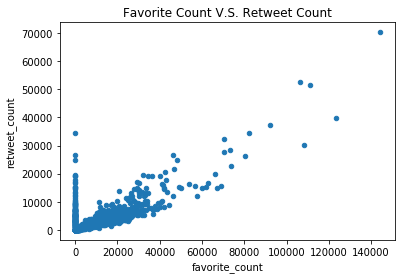

In [79]:
#Correlation plot of the favorite and retweet count

dv3.plot(kind='scatter', x='favorite_count', y='retweet_count').set_title('Favorite Count V.S. Retweet Count')
plt.savefig('correlation.png');